In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from explore import get_auto_mpg, train_val_test

import wrangle

In [2]:
df = get_auto_mpg()
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
train, val, test = train_val_test(df, stratify = 'mpg')
train.shape, val.shape, test.shape

((235, 9), (78, 9), (79, 9))

## Establish baseline and model predictions

The baseline is the mean of the actual values.

A basic LinearRegression model will be used to make predictions.

In [4]:
train['mpg'].mean()

23.503829787234046

In [5]:
round(train['mpg'].mean(),2)

23.5

In [6]:
preds = train[['horsepower', 'mpg']]

In [7]:
preds['baseline_preds'] = round(train['mpg'].mean(),2)
preds.head()

,horsepower,mpg,baseline_preds
212,180.0,16.5,23.5
346,67.0,32.3,23.5
325,48.0,44.3,23.5
90,198.0,12.0,23.5
246,52.0,32.8,23.5


In [8]:
ols_model = LinearRegression()

ols_model.fit(train[['horsepower']], train[['mpg']])

LinearRegression()

In [9]:
preds['yhat'] = ols_model.predict(train[['horsepower']]) #these are our model predictions
preds.head()

,horsepower,mpg,baseline_preds,yhat
212,180.0,16.5,23.5,11.058302
346,67.0,32.3,23.5,30.114463
325,48.0,44.3,23.5,33.318596
90,198.0,12.0,23.5,8.022807
246,52.0,32.8,23.5,32.644042


## Compute residuals

Predictions minus actual

In [10]:
preds['baseline_res'] = preds['baseline_preds'] - preds['mpg']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res
212,180.0,16.5,23.5,11.058302,7.0
346,67.0,32.3,23.5,30.114463,-8.8
325,48.0,44.3,23.5,33.318596,-20.8
90,198.0,12.0,23.5,8.022807,11.5
246,52.0,32.8,23.5,32.644042,-9.3


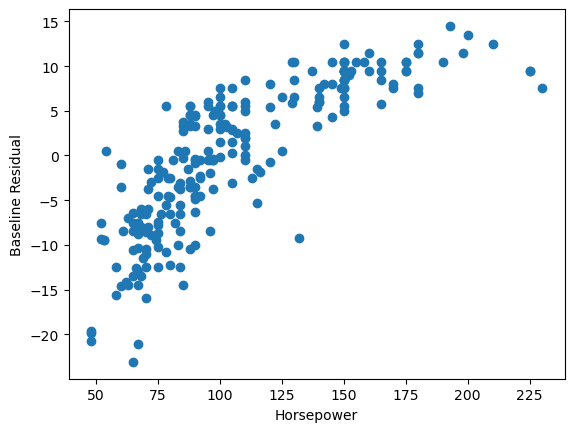

In [11]:
plt.scatter(preds['horsepower'], preds['baseline_res'])
plt.xlabel('Horsepower')
plt.ylabel('Baseline Residual')
plt.show()


In [12]:
preds['yhat_res'] = preds['yhat'] - preds['mpg']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res
212,180.0,16.5,23.5,11.058302,7.0,-5.441698
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404
90,198.0,12.0,23.5,8.022807,11.5,-3.977193
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958


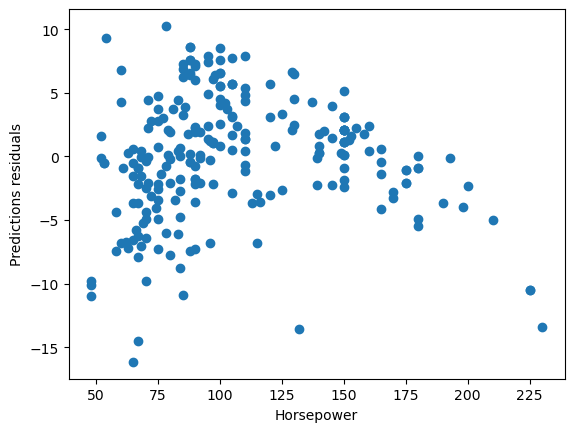

In [13]:
plt.scatter(preds['horsepower'], preds['yhat_res'])
plt.xlabel('Horsepower')
plt.ylabel('Predictions residuals')
plt.show()

## Compute SSE

SSE - Sum of Squared Errors

Also known as the RSS - Residual Sum of Squares

Predicted minus actual, squuared and summed

In [14]:
preds.columns

Index(['horsepower', 'mpg', 'baseline_preds', 'yhat', 'baseline_res',
       'yhat_res'],
      dtype='object')

In [15]:
preds['baseline_res_squared'] = preds['baseline_res'] ** 2

preds['yhat_res_squared'] = preds['yhat_res'] ** 2

preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323


In [16]:
sse_baseline = preds['baseline_res_squared'].sum()
sse_yhat = preds['yhat_res_squared'].sum()
sse_baseline, sse_yhat

(15330.830000000002, 5355.469277811718)

## Compute MSE

MSE - Mean Squared Error

Divide the SSe by the total number of data points

In [17]:
mse_baseline = sse_baseline / len(preds)
mse_yhat = sse_yhat / len(preds)

mse_baseline , mse_yhat

(65.23757446808511, 22.789230969411566)

## Compute RMSE

RMSE - Root Mean Squared Error

In [18]:
rmse_baseline = sqrt(mse_baseline)
rmse_yhat = sqrt(mse_yhat)
rmse_baseline, rmse_yhat

# This calculates the average amount of error any value has in the units of the original value

(8.076978052965423, 4.773806758700185)

## Doing it all with the sklearn library

mean_squared_error

In [19]:
sqrt(mean_squared_error(preds['mpg'], preds['baseline_preds']))

8.076978052965423

## Compute ESS

ESS - Explained Sum of Squares

Prediction minus mean of actual values, squared and summed

In [20]:
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323


In [21]:
preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
preds.head()


,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081,-12.441698
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574,6.614463
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236,9.818596
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065,-15.477193
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323,9.144042


In [22]:
preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081,-12.441698,154.795859
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574,6.614463,43.751116
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236,9.818596,96.404826
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065,-15.477193,239.543505
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323,9.144042,83.613496


In [23]:
ess_baseline = 0
ess_yhat = preds['yhat_mean_res_squared'].sum()
ess_yhat

9975.360722188278

## Compute TSS

TSS - Total Sum of Squares

ESS + SSE


In [24]:
tss_baseline = sse_baseline + ess_baseline
tss_baseline

15330.830000000002

In [25]:
tss_yhat = sse_yhat + ess_yhat
tss_yhat

15330.829999999994

In [26]:
ess_baseline / tss_baseline

0.0

In [27]:
ess_yhat / tss_yhat

0.6506732330988134

## Using the sklean library instead

explained_variance_score

In [28]:
explained_variance_score(preds['mpg'], preds['yhat'])

0.6506731545601601

# Exercises

In [29]:
train, val, test = wrangle.wrangle_zillow() #function that acquires, preps, and splits zillow data

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
def drop_outliers(train, column):
    Q1 = np.percentile(train[column], 25, interpolation = 'midpoint')
    Q3 = np.percentile(train[column], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    train = train[(train[column] <= Q3 + (1.5 * IQR)) & (train[column] >= Q1 - (1.5 * IQR))]
    return train

In [32]:
train = drop_outliers(train, 'tax_value')
train.shape

(1116041, 7)

In [33]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
553191,4.0,2.0,1556.0,373090.0,1923.0,4579.25,6037.0
1209132,3.0,2.0,1513.0,74070.0,1937.0,986.55,6037.0
174634,4.0,2.0,2040.0,138000.0,1954.0,2553.05,6037.0
170584,3.0,2.0,1834.0,263870.0,1959.0,3139.76,6059.0
2001226,2.0,2.0,1225.0,335603.0,1975.0,3461.38,6059.0


In [34]:
train = drop_outliers(train, 'area')

In [35]:
from sklearn.preprocessing import MinMaxScaler #these are notes from class

In [36]:
MinMax = MinMaxScaler()
train['area'] = MinMax.fit_transform(train[['area']])

In [37]:
MinMax = MinMaxScaler()
train['tax_value'] = MinMax.fit_transform(train[['tax_value']])

In [38]:
reg_zillow = train[['tax_value', 'area']] 
#creating dataframe with just the two variables that I am interested in modeling
reg_zillow.head()

,tax_value,area
553191,0.354295,0.465430
1209132,0.070322,0.452559
174634,0.131035,0.610296
170584,0.250571,0.548638
2001226,0.318694,0.366357


## Fitting the model

In [39]:


zols_model = LinearRegression()

zols_model.fit(reg_zillow[['area']], reg_zillow[['tax_value']])

LinearRegression()

## Calculating yhat and SSE

In [40]:
reg_zillow['yhats'] = zols_model.predict(reg_zillow[['area']]) #these are our model predictions
reg_zillow.head()

,tax_value,area,yhats
553191,0.354295,0.465430,0.306887
1209132,0.070322,0.452559,0.300046
174634,0.131035,0.610296,0.383893
170584,0.250571,0.548638,0.351118
2001226,0.318694,0.366357,0.254225


In [41]:
reg_zillow['yhats_res'] = reg_zillow['yhats'] - reg_zillow['tax_value']
reg_zillow['yhat_res_squared'] = reg_zillow['yhats_res'] ** 2
reg_zillow['baseline'] = reg_zillow['tax_value'].mean()
reg_zillow['baseline_res'] = reg_zillow['baseline'] - reg_zillow['tax_value']
reg_zillow['baseline_res_squared'] = reg_zillow['baseline_res'] ** 2
reg_zillow.head()


,tax_value,area,yhats,yhats_res,yhat_res_squared,baseline,baseline_res,baseline_res_squared
553191,0.354295,0.465430,0.306887,-0.047407,0.002247,0.324228,-0.030067,0.000904
1209132,0.070322,0.452559,0.300046,0.229724,0.052773,0.324228,0.253906,0.064468
174634,0.131035,0.610296,0.383893,0.252858,0.063937,0.324228,0.193193,0.037323
170584,0.250571,0.548638,0.351118,0.100547,0.010110,0.324228,0.073657,0.005425
2001226,0.318694,0.366357,0.254225,-0.064469,0.004156,0.324228,0.005533,0.000031


In [42]:
zillow_sse = reg_zillow['yhat_res_squared'].sum()
base_sse = reg_zillow['baseline_res_squared'].sum()
zillow_sse, base_sse

(36757.21599761266, 46102.77398029525)

## Plotting residuals

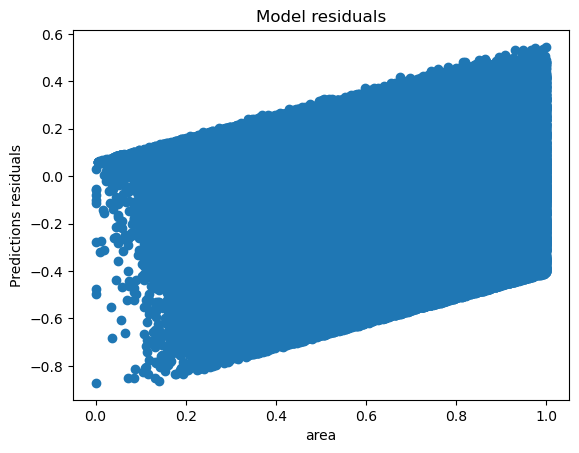

In [43]:
plt.scatter(reg_zillow['area'], reg_zillow['yhats_res'])
plt.xlabel('area')
plt.ylabel('Predictions residuals')
plt.title('Model residuals')
plt.show()

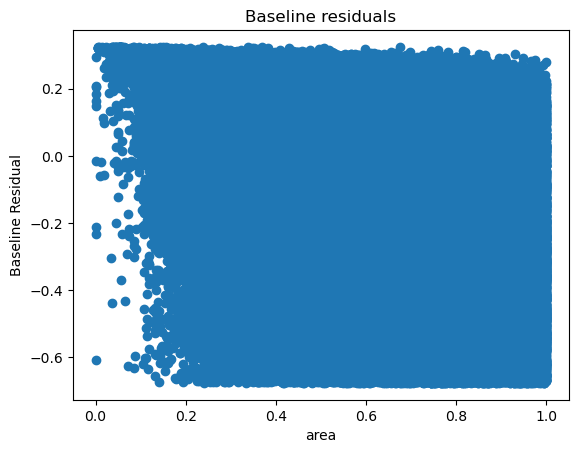

In [44]:
plt.scatter(reg_zillow['area'], reg_zillow['baseline_res'])
plt.xlabel('area')
plt.ylabel('Baseline Residual')
plt.title('Baseline residuals')
plt.show()


## Calculating mean squared errors 

In [45]:
mse_base = base_sse / len(reg_zillow)
mse_yhat = zillow_sse / len(reg_zillow)

mse_base , mse_yhat

(0.04259503061418639, 0.03396053220961837)

## Calculating Root mean squared errors

In [46]:
rmse_base = sqrt(mse_base)
rmse_yhat = sqrt(mse_yhat)
rmse_base, rmse_yhat

(0.2063856356779376, 0.1842838359965908)

In [47]:
sqrt(mean_squared_error(reg_zillow['tax_value'], reg_zillow['baseline']))

0.2063856356779376

In [48]:
reg_zillow.head()

,tax_value,area,yhats,yhats_res,yhat_res_squared,baseline,baseline_res,baseline_res_squared
553191,0.354295,0.465430,0.306887,-0.047407,0.002247,0.324228,-0.030067,0.000904
1209132,0.070322,0.452559,0.300046,0.229724,0.052773,0.324228,0.253906,0.064468
174634,0.131035,0.610296,0.383893,0.252858,0.063937,0.324228,0.193193,0.037323
170584,0.250571,0.548638,0.351118,0.100547,0.010110,0.324228,0.073657,0.005425
2001226,0.318694,0.366357,0.254225,-0.064469,0.004156,0.324228,0.005533,0.000031


## Calculating Explained sum of squares

In [49]:
reg_zillow['yhat_mean_res'] = reg_zillow['yhats'] - reg_zillow['baseline']

reg_zillow['yhat_mean_res_squared'] = reg_zillow['yhat_mean_res'] ** 2

ess_baseline = 0
ess_yhat = reg_zillow['yhat_mean_res_squared'].sum()
ess_yhat

9345.557982682674

In [50]:
reg_zillow.head()

,tax_value,area,yhats,yhats_res,yhat_res_squared,baseline,baseline_res,baseline_res_squared,yhat_mean_res,yhat_mean_res_squared
553191,0.354295,0.465430,0.306887,-0.047407,0.002247,0.324228,-0.030067,0.000904,-0.017340,0.000301
1209132,0.070322,0.452559,0.300046,0.229724,0.052773,0.324228,0.253906,0.064468,-0.024182,0.000585
174634,0.131035,0.610296,0.383893,0.252858,0.063937,0.324228,0.193193,0.037323,0.059665,0.003560
170584,0.250571,0.548638,0.351118,0.100547,0.010110,0.324228,0.073657,0.005425,0.026890,0.000723
2001226,0.318694,0.366357,0.254225,-0.064469,0.004156,0.324228,0.005533,0.000031,-0.070003,0.004900


## Calculating total sum of squares

In [51]:
tss_baseline = base_sse + ess_baseline
tss_baseline

46102.77398029525

In [52]:
tss_yhat = zillow_sse + ess_yhat
tss_yhat

46102.77398029533

In [53]:
ess_baseline / tss_baseline

0.0

In [54]:
ess_yhat / tss_yhat

0.20271140271683077

In [55]:
explained_variance_score(reg_zillow['tax_value'], reg_zillow['yhats'])

0.2027114027168293